<a href="https://colab.research.google.com/github/SoniaAndrys/pca/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import norm
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA, FastICA

Getting file from Google Drive (unused)

```
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=1ToerfTJ2Bu98Bs69vQ7JW_vO29tSvKD5' #dane
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('do_pca_nolab_6k_tsv.txt')  
df = pd.read_csv('do_pca_nolab_6k_tsv.txt', delimiter="\t")
```



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/SoniaAndrys/pca/master/6k_100_600.tsv', delimiter='\t')
formulas = df[df.columns[8]] 
spec = df[df.columns[7]] #zwitterion = 0; base = 1; acid =2, neutral=3 - to są zakodowane mol_species

In [19]:
df.head()

,Mol_Weight,AlogP,PSA,HBA,HBD,QED_Weighted,Arom_Rings,Mol_Species,Smiles
0,171.16,-1.46,117.78,5,3,0.51,1,0,N[C@H](CCc1nnn[nH]1)C(=O)O
1,193.25,1.24,40.54,2,1,0.78,1,0,CN(C)C(Cc1ccccc1)C(=O)O
2,155.20,0.77,49.33,2,2,0.62,0,0,CCC1CC=C(CN1)C(=O)O
3,182.22,0.27,64.35,3,2,0.37,0,1,NC1CC=C(C1)C(=O)NOCC=C
4,159.19,1.78,41.57,2,1,0.69,2,3,Cc1[nH]cnc1c2ccncc2


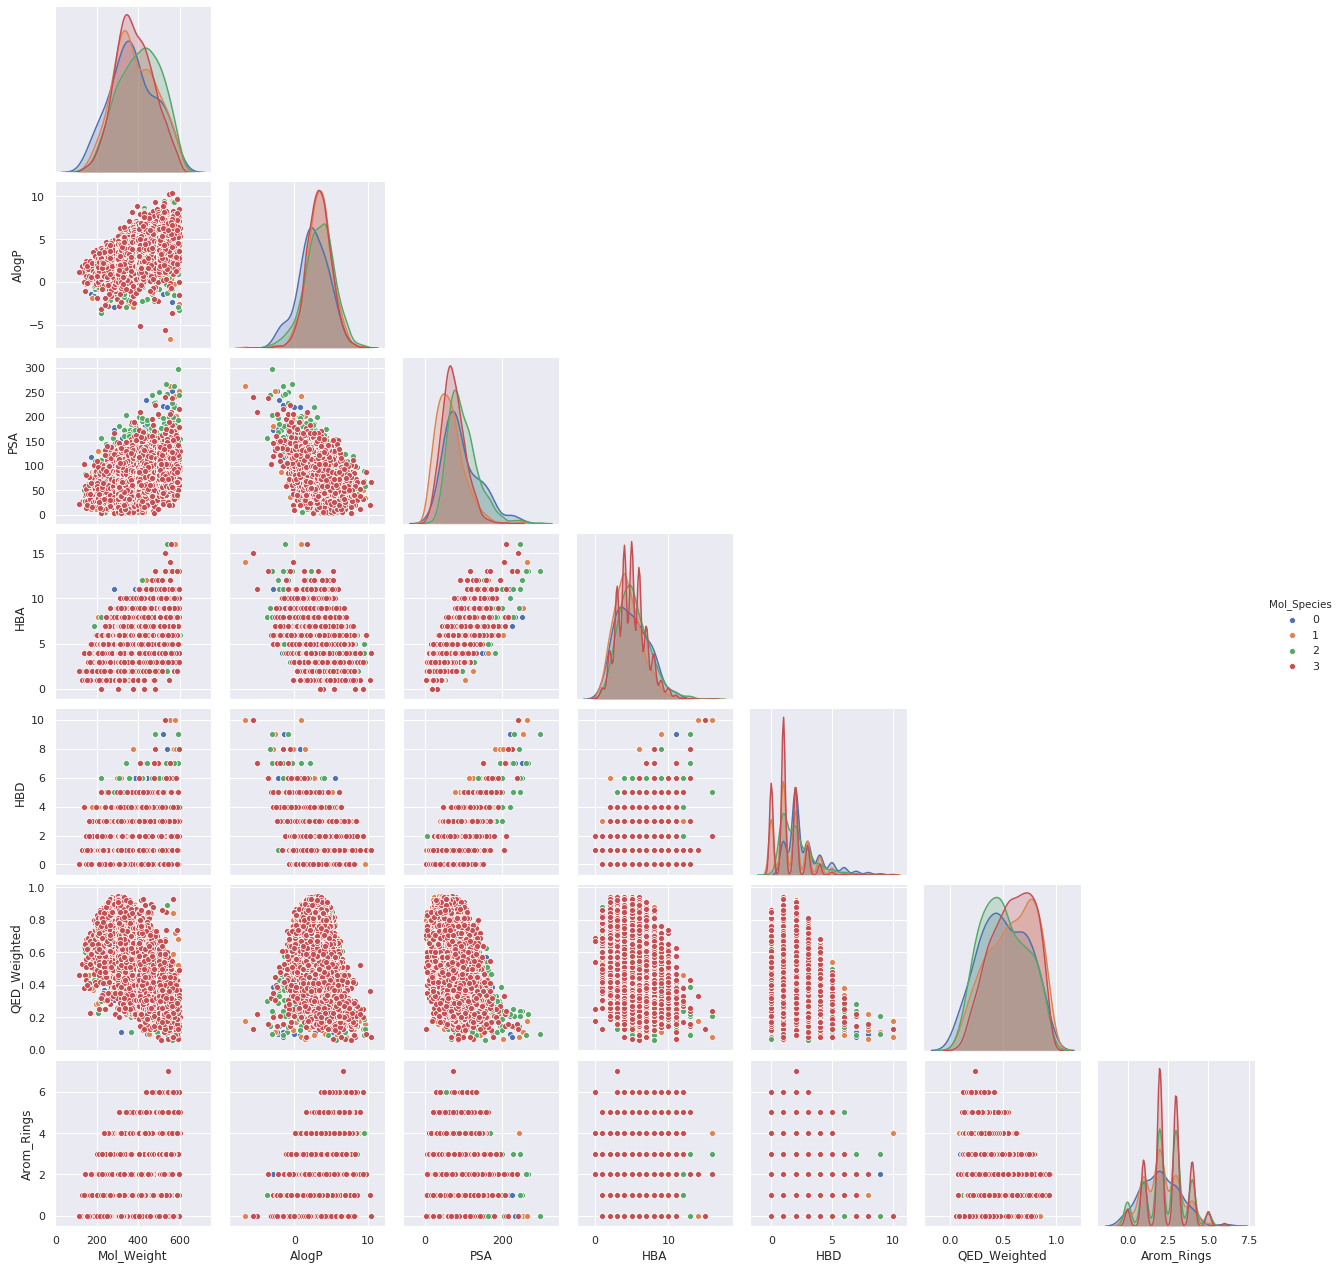

In [0]:
sns.pairplot(df, corner = True, hue = "Mol_Species")

In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Mol_Weight,AlogP,PSA,HBA,HBD,QED_Weighted,Arom_Rings,Mol_Species
Mol_Weight,1,0.445,0.455,0.495,0.195,-0.621,0.422,-0.0211
AlogP,0.445,1,-0.358,-0.236,-0.28,-0.317,0.476,0.0242
PSA,0.455,-0.358,1,0.745,0.666,-0.466,0.107,-0.036
HBA,0.495,-0.236,0.745,1,0.254,-0.407,0.282,0.0515
HBD,0.195,-0.28,0.666,0.254,1,-0.348,-0.0494,-0.226
QED_Weighted,-0.621,-0.317,-0.466,-0.407,-0.348,1,-0.36,0.071
Arom_Rings,0.422,0.476,0.107,0.282,-0.0494,-0.36,1,0.102
Mol_Species,-0.0211,0.0242,-0.036,0.0515,-0.226,0.071,0.102,1


In [0]:
X = df[["Mol_Weight", "AlogP", "PSA", "HBA", "HBD", "QED_Weighted", "Arom_Rings", "Mol_Species"]]
Xmean = X.mean()
A = X - Xmean
rho = np.power(np.linalg.norm(A, 'fro'), 2)
print("total variation of data:", rho)

U, S, V = np.linalg.svd(A, 'econ')
sigma = np.diag(S) # singular values

rho = np.power(np.linalg.norm(sigma), 2)
print(Xmean)

total variation of data: 59985698.314173914
Mol_Weight      386.636777
AlogP             3.367149
PSA              76.945273
HBA               4.997332
HBD               1.479907
QED_Weighted      0.576443
Arom_Rings        2.417209
Mol_Species       2.522094
dtype: float64


In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [0]:
pca = PCA(n_components=8) 
principal_components = pca.fit_transform(X)
new_X = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [0]:
new_X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.247330,4.132831,2.231956,-1.137818,-0.655747,1.611283,0.208109,-0.475911
1,-2.910312,1.741696,2.629244,-1.351906,-0.188944,0.743810,0.273961,-0.183717
2,-2.596864,2.645307,3.023101,-0.497973,0.041993,1.340681,-0.010693,-0.082100
3,-1.555980,2.595916,1.980232,0.264867,0.395338,2.132605,0.183677,0.008121
4,-2.767505,0.736233,-0.333814,0.554628,-0.996081,1.112363,0.122883,-0.134194


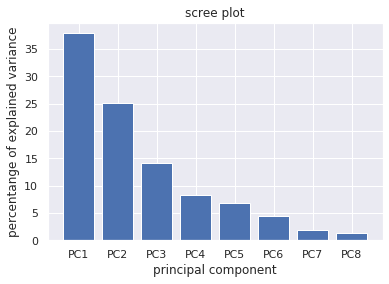

In [0]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

[ 37.88  63.02  77.12  85.42  92.31  96.84  98.67 100.  ]


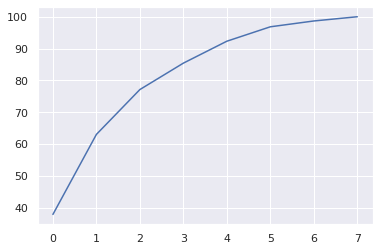

In [0]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

(5997, 3)


Text(0.5, 0, 'PC3')

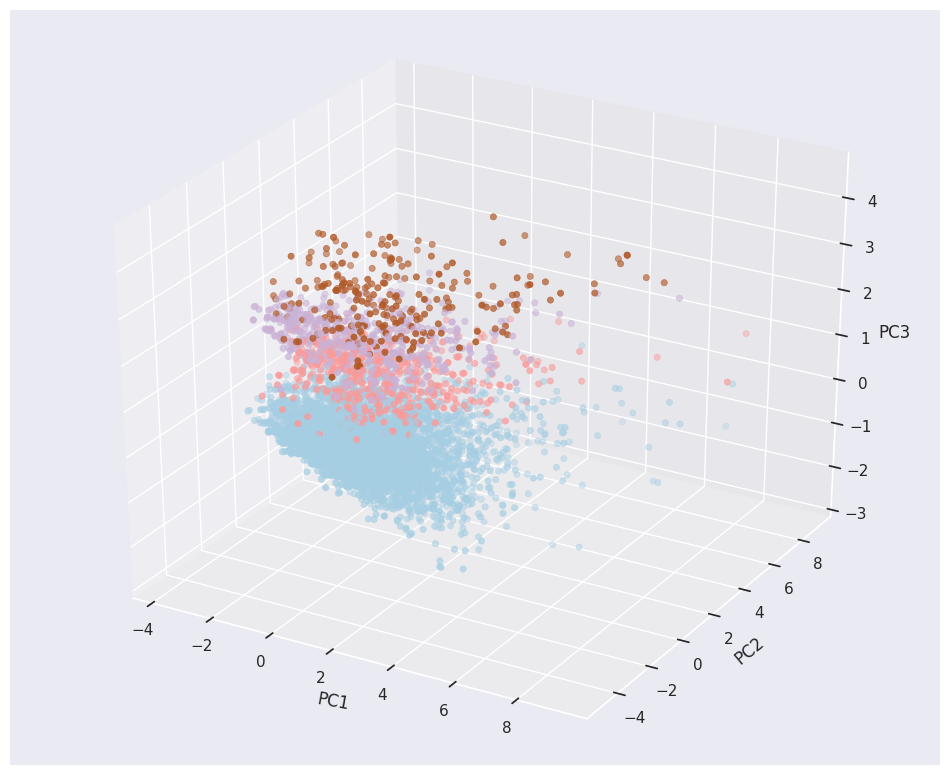

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from matplotlib.pyplot import figure
pca = PCA(n_components=3)
proj = pca.fit_transform(X)
print(proj.shape)
x = proj[:,0]
y = proj[:, 1]
z = proj[:, 2]
figure(figsize=(12, 10), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap=plt.get_cmap('Paired', 4), vmin=0, vmax=3, linewidth=0.5);
ax.set_xlabel('PC1', fontsize=12, rotation=-10)
ax.set_ylabel('PC2', fontsize=12, rotation=40)
ax.set_zlabel('PC3', fontsize=12)


In [0]:
from sklearn import utils
utils.multiclass.type_of_target(proj)

'continuous-multioutput'

In [0]:
from sklearn.model_selection import train_test_split
init = np.random.randint(0,1000)
pca = PCA(n_components=8) 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
MW_encoded = label_encoder.fit_transform(df['Mol_Weight'])

X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(X)[:,0:5], MW_encoded, train_size=0.65,test_size=0.35, random_state=init)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
clf = LinearDiscriminantAnalysis('lsqr')
#clf = KNeighborsClassifier(4)

print(clf.fit(X_train, y_train))

predicted = clf.predict(X_test)
expected = y_test

print("Score = ",clf.score(X_train, y_train))


/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_empirical_covariance.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)
Score =  0.5459209851205746


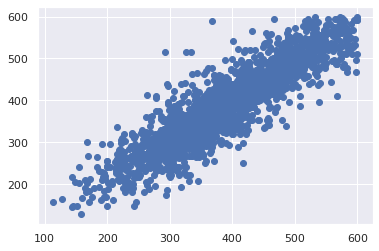

In [0]:
plt.scatter(label_encoder.inverse_transform(expected), label_encoder.inverse_transform(predicted),)